<h2 style="text-align: center;">FINAL PROJECT - TEAM TWO</h2>
<h3 style="text-align: center;">USD MADS - 500B</h3>
<h3 style="text-align: center;">Fall 2024, Professor Jules Malin</h3>
<div></div>


<br>
<h3 style="text-align: center;">Team Two:</h3>
<h2 style="text-align: center;">Franky Hernandez</h2>
<h2 style="text-align: center;">Katie Kimberling</h2>
<h2 style="text-align: center;">Jason Avalos</h2>

<div></div>

## <span style="color:black"><div align="center">INTRODUCTION AND EXPLANATION OF BUSINESS PROBLEM </div></span>

Team Two chose the <strong>e-commerce dataset from the UCI Machine Learning Repository</strong>. This dataset has 12,330 records with 17 different features (variables) describing the behavior of a potential customer on an e-commerce retail site (think Amazon or Zappos - a site that only offers products through internet shopping, not brick-and-mortar retail stores with physical locations). For the purposes of this project, a "customer" is defined as an individual who has successfully made a purchase on the website.

<strong>Our overall goal is to make data-driven recommendations to our clients that increase customer engagement.</srong> 

Increasing customer engagement not only leads to higher sales and revenue, but it increases brand loyalty and word-of-mouth marketing by customers. Increasing customer engagement could include such things as: 
1. Determining ways to decrease bounce rates and exit rates (defined below),
2. Increasing purchase rates by suggesting modifications to the website (what pages are experiencing the highest sale conversions and/or exit rates), and
3. Identifying characteristcs of viewers who make purchases so that targeted advertising can be used for non-customers with the same characteristics (conversions).

To make suggestions to increase cusomter engagement, we used the dataset to assess the following question:
*  On which pages are viewers are spending the most time, especially prior to a purchase? More specifically, which types of pages (i.e. administrative, informational or product-related) have the highest duration of time spent on them ("dwell time") prior to a customer making a purchase?

## <span style="color:black"><div align="center"><strong>PART ONE:</strong> Data Importing and Pre-processing </div></span>

### Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

The following packages were imported for the following reasons: 
- <strong>pandas</strong> in python for data anlysis
- <strong>numpy</strong> to be used for calculations 
- <strong>seaborn</strong> -- to be used in conjunction with matplotlib for statistical data visualizations
- <strong>matplotlib.pyplot</strong> for data visualizations and graphs
- <strong>scipy</strong> in order to use the Winsorization function to adjust skewness and handle outliers
- <strong>sklearn</strong> for supervised and unsupervised learning, regression and classification, splitting data into training and testing datasets, and calculating confusion matrices and accuracy scores of logistic regressions
- <strong>statsmodels</strong> in order to calculate variance inflaction factors

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Import dataset
e_df = pd.read_csv('online_shoppers_intention.csv')
e_df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False


In [3]:
# Describe the dataset
print(f"Dataset Dimensions: {e_df.shape}")
print(f"\nData Types:\n{e_df.dtypes}")
print(f"\nDataset Information:\n{e_df.info()}")
print(f"\nDataset Summary:\n{e_df.describe()}")

Dataset Dimensions: (12330, 18)

Data Types:
Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-

### Clean, wrangle, and handle missing data

In [4]:
# Check for missing values
print(f"Missing Values:\n{e_df.isnull().sum()}")

# --------Handle Missing Values--------

# Fill numeric columns with the median
e_df['BounceRates'].fillna(e_df['BounceRates'].median())
e_df['ExitRates'].fillna(e_df['ExitRates'].median())

# Replace page duration columns with 0
e_df['Administrative_Duration'].fillna(0)
e_df['Informational_Duration'].fillna(0)
e_df['ProductRelated_Duration'].fillna(0)

# Fill categorical values with mode 
e_df['Month'].fillna(e_df['Month'].mode()[0])
e_df['VisitorType'].fillna(e_df['VisitorType'].mode()[0])

# Drop any remaining rows that have missing values 
e_df.dropna(inplace=True)

print("Number of rows after dropping missing values:", len(e_df))

Missing Values:
Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64
Number of rows after dropping missing values: 11948


### Transform data appropriately using techniques such as aggregation, normalization, and feature construction

In [5]:
# Normalize numerical features to ensure consistent scales
scaler = MinMaxScaler()
e_df[['BounceRates', 'ExitRates', 'ProductRelated_Duration']] = scaler.fit_transform(
    e_df[['BounceRates', 'ExitRates', 'ProductRelated_Duration']]
)

# Aggregate the average product-related duration by Region and reset the index
region_product_duration = e_df.groupby('Region')['ProductRelated_Duration'].mean().reset_index()
region_product_duration.rename(columns={'ProductRelated_Duration': 'Avg_Product_Duration'}, inplace=True)

# Drop any duplicate 'Avg_Product_Duration' columns
if 'Avg_Product_Duration' in e_df.columns:
    e_df = e_df.drop(columns=['Avg_Product_Duration'])

# Now merge with the main dataframe
e_df = e_df.merge(region_product_duration, on='Region', how='left')

# Feature Construction: Create a "Total Duration" feature for overall session length
e_df['TotalDuration'] = e_df['Administrative_Duration'] + e_df['Informational_Duration'] + e_df['ProductRelated_Duration']

### Reduce redundant data and perform need based discretization

In [6]:
# Drop redundant columns
# Discretize 'TotalDuration' into categories
e_df['DurationCategory'] = pd.cut(e_df['TotalDuration'], bins=3, labels=["Low", "Medium", "High"])

# Final review of the cleaned and preprocessed data
print(f"\nFinal DataFrame Summary:\n{e_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11948 entries, 0 to 11947
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           11948 non-null  int64   
 1   Administrative_Duration  11948 non-null  float64 
 2   Informational            11948 non-null  float64 
 3   Informational_Duration   11948 non-null  float64 
 4   ProductRelated           11948 non-null  int64   
 5   ProductRelated_Duration  11948 non-null  float64 
 6   BounceRates              11948 non-null  float64 
 7   ExitRates                11948 non-null  float64 
 8   PageValues               11948 non-null  float64 
 9   SpecialDay               11948 non-null  float64 
 10  Month                    11948 non-null  object  
 11  OperatingSystems         11948 non-null  float64 
 12  Browser                  11948 non-null  int64   
 13  Region                   11948 non-null  int64   
 14  Traffi

In [7]:
# Sample final data
print(f"\nSample Data:\n{e_df.head(3)}")


Sample Data:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0            0.0   
1               0                      0.0            0.0   
2               0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                    0.000   
1                     0.0               2                    0.001   
2                     0.0               1                    0.000   

   BounceRates  ExitRates  PageValues  SpecialDay  ... OperatingSystems  \
0          1.0        1.0         0.0         0.0  ...              1.0   
1          0.0        0.5         0.0         0.0  ...              2.0   
2          1.0        1.0         0.0         0.0  ...              4.0   

   Browser  Region  TrafficType        VisitorType Weekend  Revenue  \
0        1       1            1  Returning_Visitor   False    False   
1        2       

## <span style="color:black"><div align="center"><strong>PART TWO:</strong> Data Analysis and Visualization </div></span>

### Identify categorical, ordinal, and numerical variables within the data

<p><strong>CATEGORICAL VARIABLES:</strong>
Administrative, Informational, ProductRelated, Month, Weekend, Revenue,
DurationCategory, Operating Systems, Browser,Region, TrafficType, VisitorType, Weekendd, Revenue, and DurationCategory

<strong>NUMERICAL VARIABLES:</strong>
ProductRelated_Duration, BounceRates, ExitRates, PageValues, 
SpecialDay, Avg_Product_Duration, and TotalDuration</p>

### Provide measures of centrality and distribution with visualizations

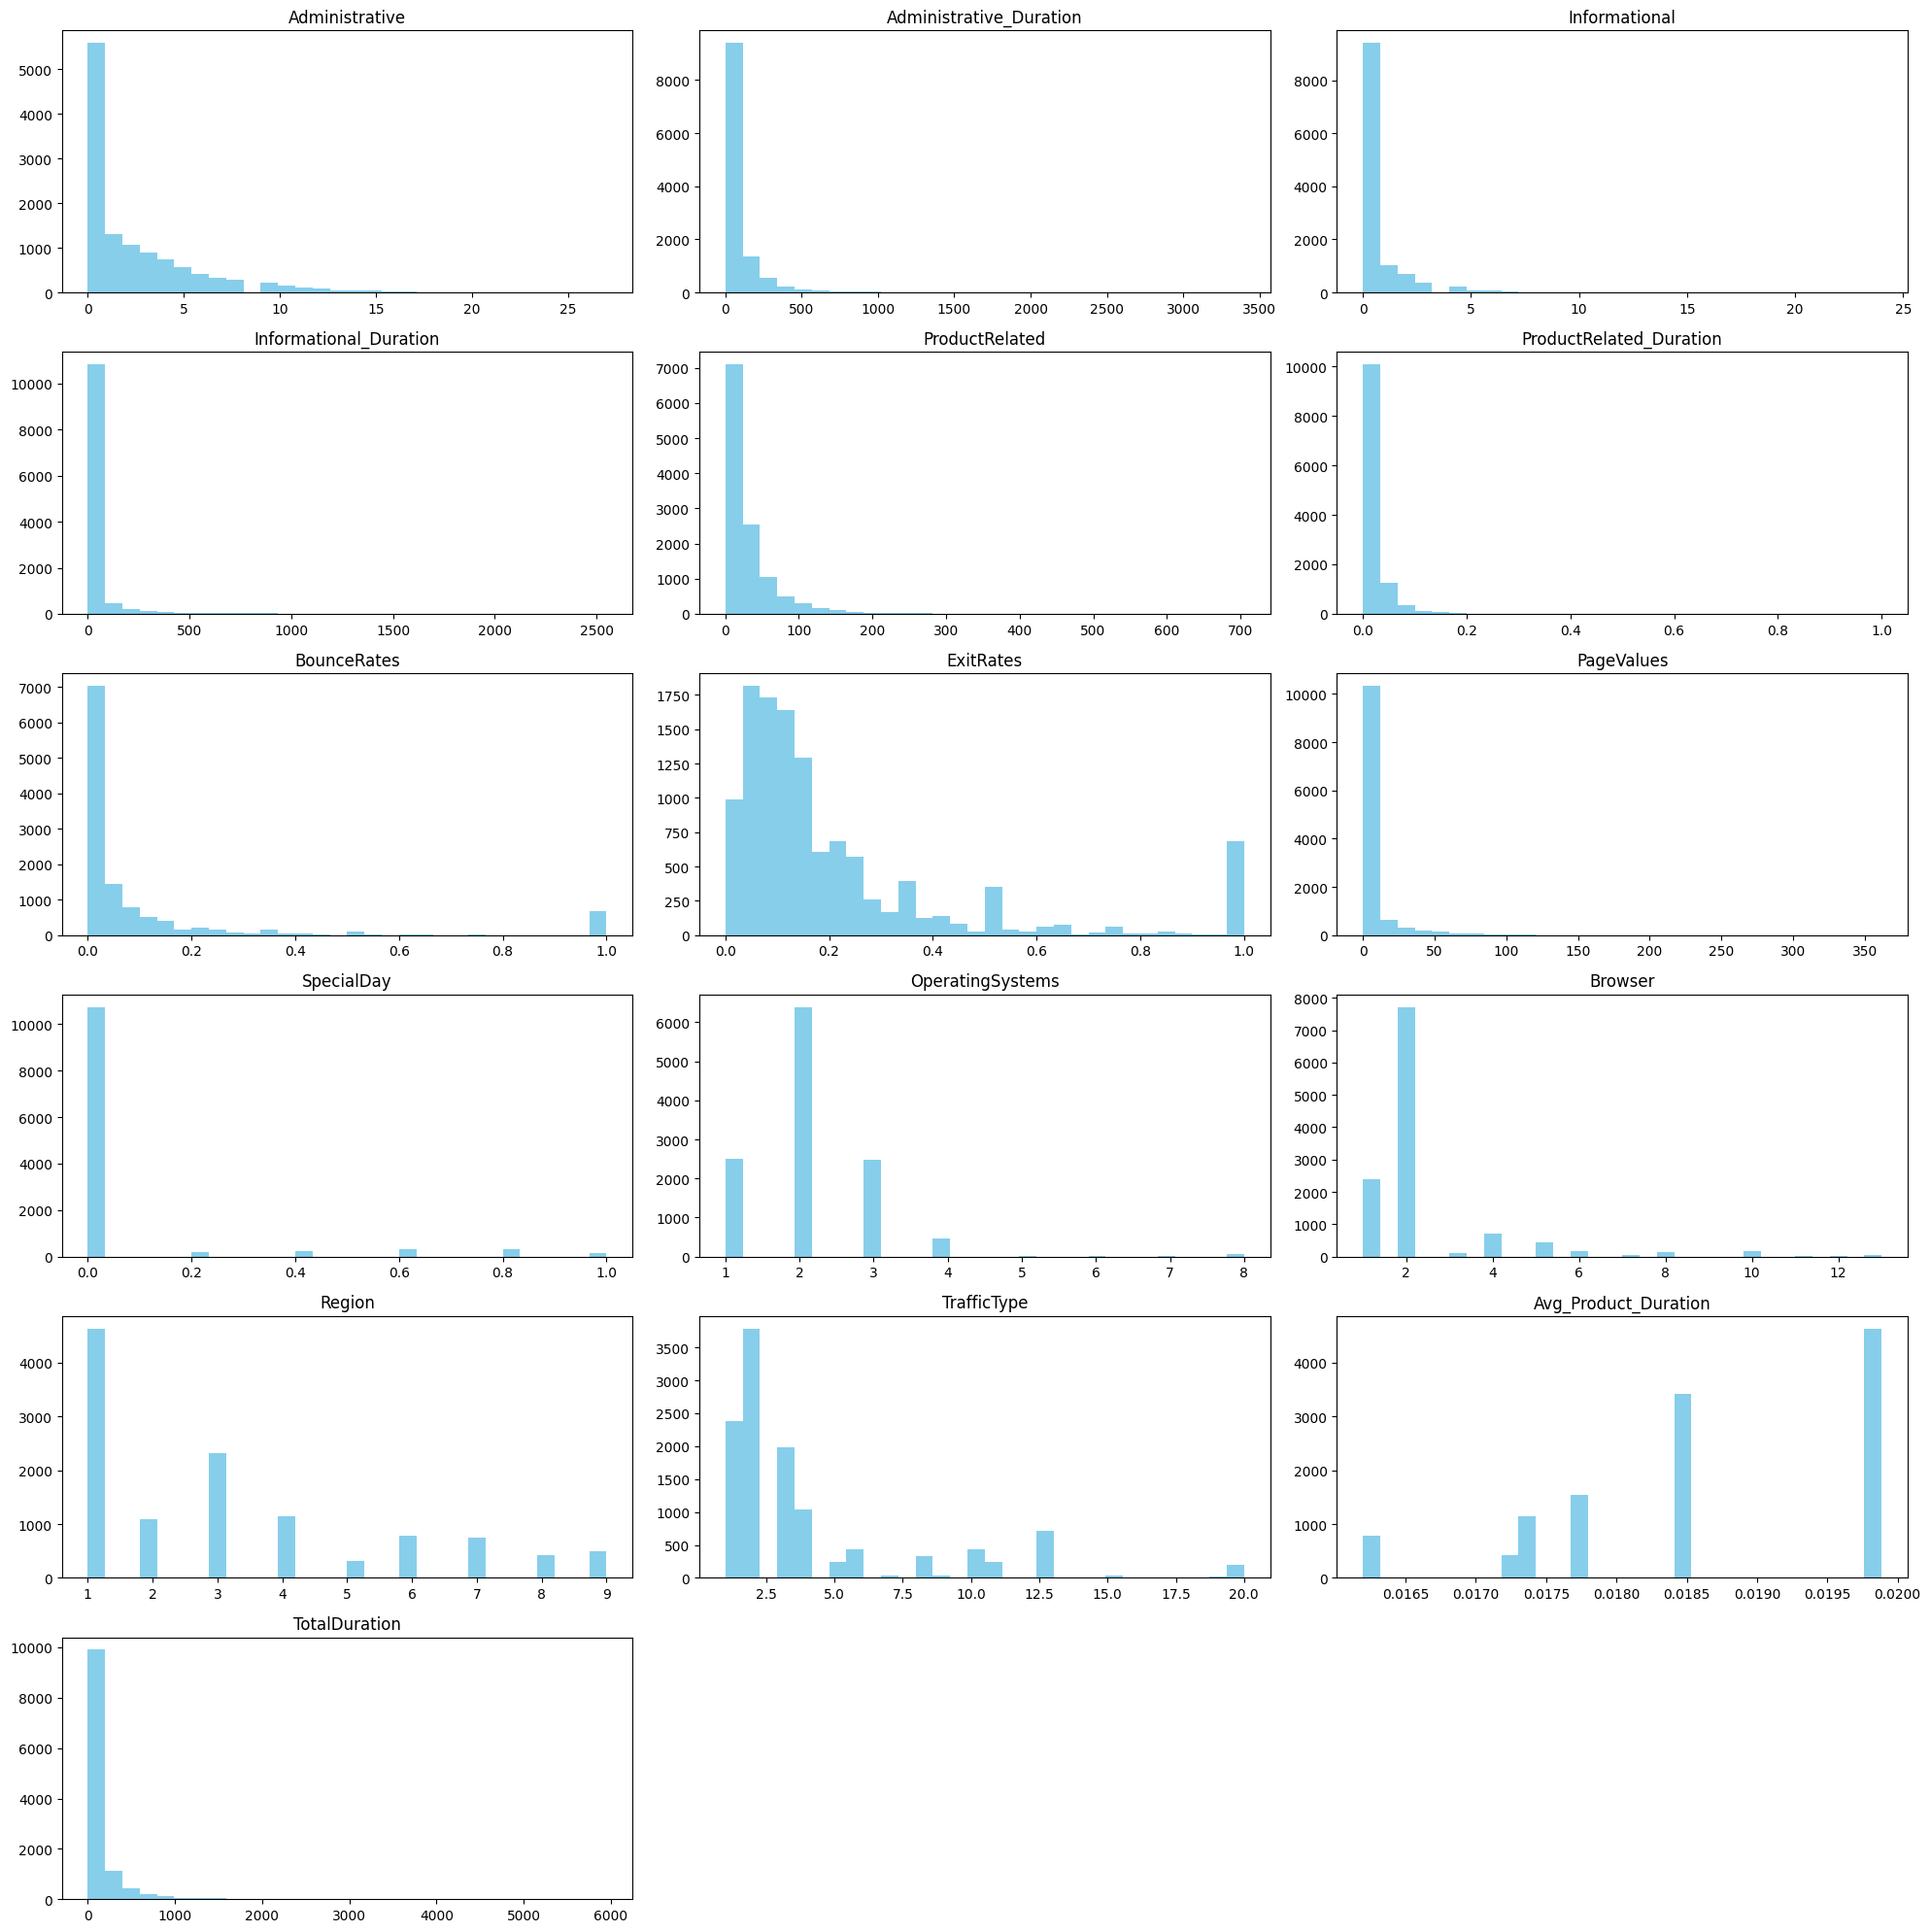

In [8]:
# Overview of the Data with Histograms

#Selecting the numerical variables based on datatype
numeric_features = e_df.select_dtypes(include=['int64', 'float64']).columns

# Adjust the figure size to accommodate all plots
plt.figure(figsize=(20, 20))  # Increased height to fit more rows

# Calculate the number of rows needed for the subplots
num_rows = (len(numeric_features) + 2) // 3  # Adding 2 to ensure enough space

for i, col in enumerate(numeric_features, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically calculate number of rows
    plt.hist(e_df[col], bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
# List all numerical variables for analysis
numerical_variables = ['ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Avg_Product_Duration', 'TotalDuration', 'SpecialDay']

# Filter numerical 
numerical_df = e_df[ numerical_variables]

In [10]:
# Descriptive Statistics for Numerical Variables
numerical_df.describe()

,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Avg_Product_Duration,TotalDuration,SpecialDay
count,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000
mean,0.018638,0.110817,0.215265,5.938418,0.018638,115.565329,0.061383
std,0.029818,0.242254,0.242886,18.719907,0.001150,251.068151,0.198728
min,0.000000,0.000000,0.000000,0.000000,0.016197,0.000000,0.000000
25%,0.002877,0.000000,0.071429,0.000000,0.017748,0.005443,0.000000
50%,0.009367,0.015535,0.125543,0.000000,0.018512,19.004501,0.000000
75%,0.022849,0.083333,0.250000,0.000000,0.019887,121.276726,0.000000
max,1.000000,1.000000,1.000000,361.763742,0.019887,5949.125000,1.000000


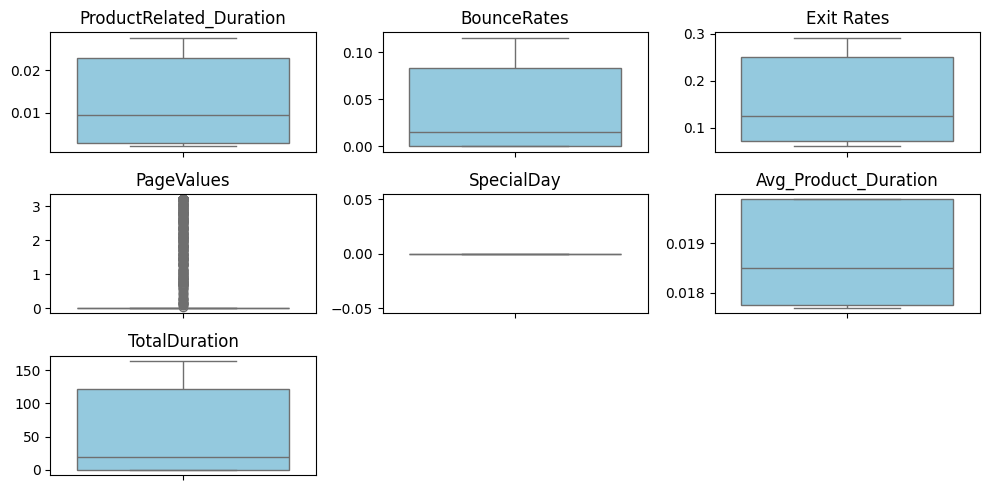

In [11]:
# Create subplots
# Axes 2*3 matrix axes
# Winsorize 10% from both the lower and upper tails
# numerical_df = winsorize(numerical_df, limits=[0.1, 0.1])
# Winsorize 10% from both the lower and upper tails
def winsorize_dataframe(df, limits=(0.2, 0.2)):
    """Winsorizes all numeric columns in the dataframe."""
    df_winsorized = df.copy()
    for col in df_winsorized.select_dtypes(include='number'):
        df_winsorized[col] = winsorize(df_winsorized[col], limits=limits)
    return df_winsorized

numerical_df = winsorize_dataframe(numerical_df)

fig, axes = plt.subplots(3, 3, figsize=(10, 5))

# Boxplot for ProductRelated_Duration
sns.boxplot(y=numerical_df['ProductRelated_Duration'], ax=axes[0,0], color='skyblue')
axes[0,0].set_title('ProductRelated_Duration')

# Boxplot for BounceRates
sns.boxplot(y=numerical_df['BounceRates'],  ax=axes[0,1], color='skyblue')
axes[0,1].set_title('BounceRates')

# Boxplot for ExitRates
sns.boxplot(y=numerical_df['ExitRates'], ax=axes[0,2], color='skyblue')
axes[0,2].set_title('Exit Rates')

# Boxplot for PageValues
sns.boxplot(y=numerical_df['PageValues'], ax=axes[1,0], color='skyblue')
axes[1,0].set_title('PageValues')

# Boxplot for SpecialDay
sns.boxplot(y=numerical_df['SpecialDay'],  ax=axes[1,1], color='skyblue')
axes[1,1].set_title('SpecialDay')

# Boxplot for Avg_Product_Duration
sns.boxplot(y=numerical_df['Avg_Product_Duration'], ax=axes[1,2], color='skyblue' )
axes[1,2].set_title('Avg_Product_Duration')

# Boxplot for Total_Duration
sns.boxplot(y=numerical_df['TotalDuration'], ax=axes[2,0], color='skyblue')
axes[2,0].set_title('TotalDuration')

axes[2,1].set_visible(False)
axes[2,2].set_visible(False)

# Removes y-labels from all plots
for row in axes:
    for element in row:
        element.set_ylabel("")
        
plt.tight_layout()
plt.show()

# SPECIAL DAY STILL CONTAINS NAN

### Diagnose for correlations between variables and determine independent and dependent variables

<p>Based on the correlation matrix show above. The only two variables that are strongly correlated are: BounceRates and ExitRates, with a positive correlation coeeficient of .91. The remaining numerical variables have weak correlation ranging from .01 to .4.</p> 

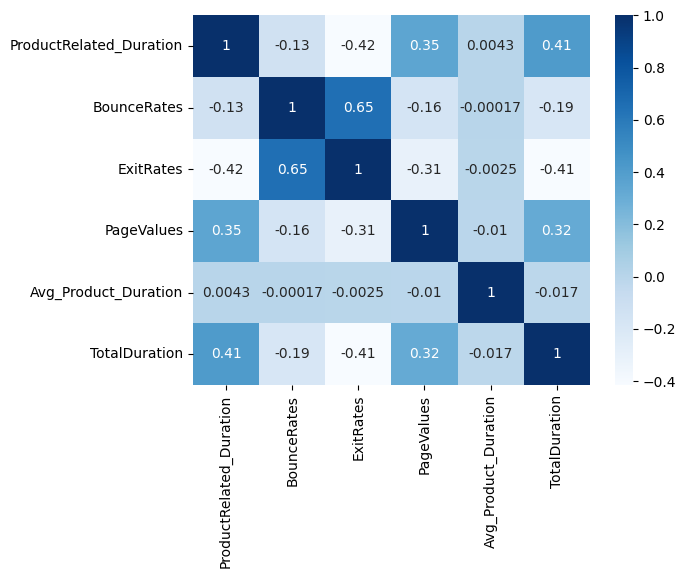

In [12]:
corr_matrix = numerical_df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

### Variance Inflation Factor (VIF)

In [13]:
import warnings
warnings.filterwarnings("ignore")

# Create dummy df to store VIF values
vif_df = pd.DataFrame()
vif_df["feature"] = numerical_df.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]

print(vif_df)

                   feature        VIF
0  ProductRelated_Duration   3.666940
1              BounceRates   3.138316
2                ExitRates   9.387867
3               PageValues   1.546095
4     Avg_Product_Duration  10.898621
5            TotalDuration   2.300693
6               SpecialDay        NaN


This implies that ExitRates and Avg_Product_Duration are likely to be correlated, representing multicollinearity concerns. However, our final model does not utilize those variables and multicolinearity does not affect the result.

### Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

#### Visitor Type Bar Chart

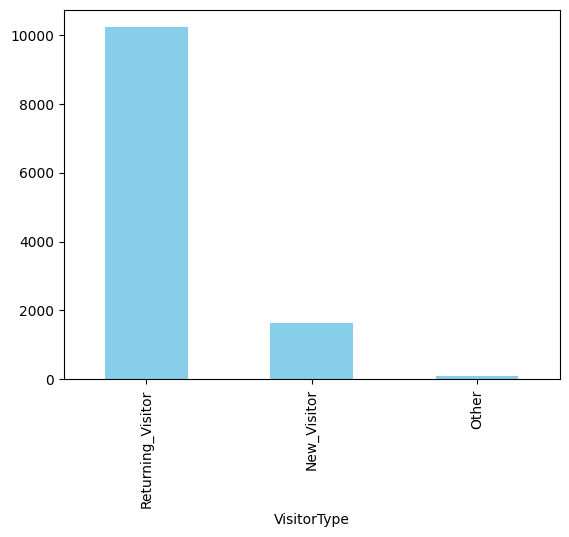

In [14]:
e_df['VisitorType'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

#### Clustered Bar Plot

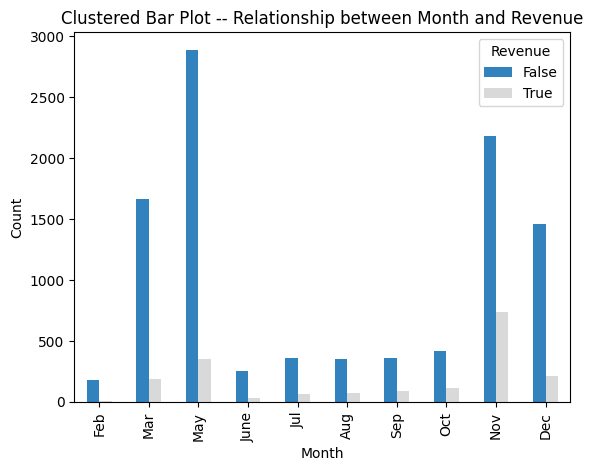

In [15]:
# Create a dictionary to map month acronyms to their numerical values
# To sort by month
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Group by the 'Month' and Sub-group by Revenue
grouped = e_df.groupby(['Month'])['Revenue'].value_counts().unstack()
grouped_df = grouped.reset_index() # Converts result to DF

# Add a new column with the numerical month values
grouped_df['month_num'] = grouped_df['Month'].map(month_order)

# Sort the DataFrame by the numerical month column
grouped_df.sort_values('month_num', inplace=True)

# Drop the temporary numerical month column
grouped_df.drop('month_num', axis=1, inplace=True)

grouped_df.plot(x='Month', kind='bar', cmap='tab20c')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Clustered Bar Plot -- Relationship between Month and Revenue')
plt.show()

#### Scatterplot between ExitRates and BounceRates

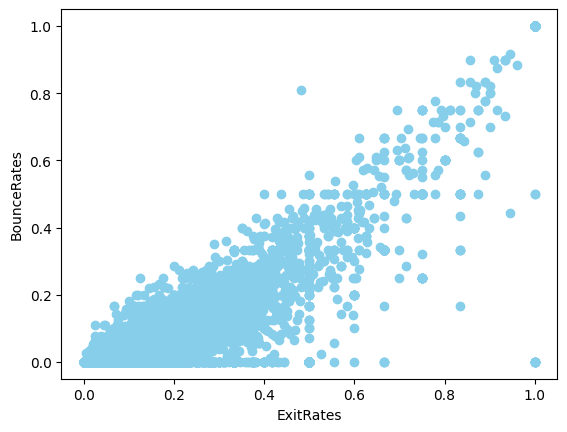

In [16]:
# Scatterplot between ExitRates and Bounces
plt.scatter(e_df['ExitRates'], e_df['BounceRates'], color='skyblue')
plt.xlabel('ExitRates')
plt.ylabel('BounceRates')
plt.show()


## <span style="color:black"><div align="center"><strong>PART THREE:</strong> Data Analytics </div></span>

#### As a reminder, we want to assess the following question:
*  Which types of pages (i.e. administrative, informational or product-related) have the highest duration of time spent on them ("dwell time") prior to a customer making a purchase?

### Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables

For research question #1: Supervised learning as the outcome/target is known. The dependent variable is "revenue," where making a purchase is defined as a binary revenue outcome of 1 - indicating a sale. The independent variables are continuous, ratio-level numerical (quantitative) variables measuring the amount of time spent on various pages - an Administrative page, an Informational page, or a Product-related page. Due to the fact that the predictor variables are continuous and quantitative, and the output variable is qualitative (categorical), a logistic regression is appropriate for this analysis.

### Train, test, and provide accuracy and evaluation metrics for model results

### Research Question: Logistic regression using duration on various pages as predictor variables for the response variable of revenue (binary).

*   independent (predictor) variables are continuous, ratio-level, numerical variables measuring "dwell time" - the amount of time a site viewer spent on 3 different types of web pages: Administrative, Information, and Product Related.

*  The dependent (response) variable is a categorial, binary variable of revenue where a 0 means no purchase/sale was made, and a 1 indicates a the customer made a purchase.

*  The data was split into training and testing datasets, where the training data represented 20% (or 2,390 records) of the total dataset, with randomly selected records.

*  A confusion matrix run on the training data indicated a model accuracy of 84.52%, meaning the model is correclty predicting the known revenue outcomes 84.52 percent of the time.

*  The original log model gave the following equation: Revenue(predicted true) = -1.91552694 + 8.76515079e-04Administrative_Duration + 5.42868244e-04Informational_Duration + 5.64771996*ProductRelated_Duration

*  We converted the coefficients of the logistic model into odds, for better ease of understanding. This rendered the equation: Revenue(predicted true) = 0.1472642127 + 1.00078567Administrative_Duration + 1.0004435Informational_Duration + 394.29338707*ProductRelated_Duration

*  The independent variables of Administrative Duration and ProductRelated Duration are both significately associated with Revenue (p<0.05), but Informational Duration is not a significant contributor to Revenue.

In [17]:
# Defining features and target variable

# The independent (predictor) variables are the amount of time spent on three different kinds of pages - 
# Administrative, Informational or Product Related
X = e_df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# The response (dependent) variable is the binary categorical variable of Revenue, where a value of 
# 0 means no sale was made, and 1 means a purchase was made by the customer on the site
y = e_df['Revenue']

# Split data into training and testing sets, using a training size ratio of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Get coefficients and intercept for the logistic model
coefficients = model.coef_
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)


# Evaluate the model and calculate the accuracy of the model and the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion:\n', confusion)

Accuracy: 0.8451882845188284
Confusion:
 [[2018    6]
 [ 364    2]]


In [1]:
# Obtaining the values of the coefficients for the logistic model.
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(method='newton')
result.params

# Get p-values for the coefficients to determine variable significance using statsmodels
p_values = result.pvalues
print("P-values:", p_values)

NameError: name 'sm' is not defined

In [ ]:
result.summary2()

In [ ]:
# Converting coefficients of the logistic regression model into odds for better understanding
log_odds = logr.coef_
odds = np.exp(log_odds)

print(odds)

Text(0.5, 427.9555555555555, 'Predicted label')

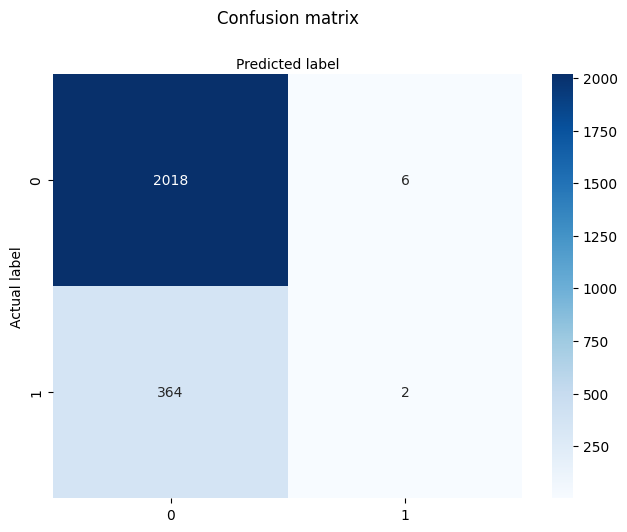

In [18]:
# Visualizing the confusion matrix using a heatmap
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

![references.png](references.png)